In [2]:
import numpy as np
from OPX_live_controller import VirtualGateSetMeasurement, QuAM
from qmucph.quam_mods.quam_mods import InOutSingleChannel_M
from quam.components.virtual_gate_set import VirtualGateSet
from quam.core import QuamRoot, quam_dataclass
from quam.components import SingleChannel, StickyChannelAddon, pulses, VirtualPulse
from dataclasses import field
from typing import List, Dict
from qm.qua import program, declare, fixed, for_, stream_processing, declare_stream, save, ramp_to_zero, align, wait
from qualang_tools.loops import from_array
import pprint
from copy import deepcopy


dividers = {'g1':1, 'g2':2, 'g3':3}
virt_rand = np.random.uniform(0,1, (3,2)) #np.ones((2,2)) - np.eye(2,2)*2 #
virtualisation_matrix = virt_rand * np.array(list(dividers.values()))[:,None]
machine = QuAM()
machine.gates = {
    "g1": SingleChannel(
        id="g1",
        opx_output=("con1", 1),
        sticky=StickyChannelAddon(duration=200, digital=False),
    ),
    "g2": SingleChannel(
        id="g2",
        opx_output=("con1", 2),
        sticky=StickyChannelAddon(duration=200, digital=False),
    ),
    "g3": SingleChannel(
        id="g3",
        opx_output=("con1", 3),
        sticky=StickyChannelAddon(duration=200, digital=False),
    ),
}

machine.VirtualGateSet1 = VirtualGateSet(
    gates=["#/gates/g1", "#/gates/g2", "#/gates/g3"], # Be careful with ordering
    virtual_gates={"v1": virtualisation_matrix[:,0],
                    "v2": virtualisation_matrix[:,1],
                    }, 
    pulse_defaults=[
        pulses.SquarePulse(amplitude=None, length=None),
        pulses.SquarePulse(amplitude=None, length=None),
        pulses.SquarePulse(amplitude=None, length=None),
    ],
)

machine.VirtualGateSet2 = VirtualGateSet(
    gates=["#/gates/g1", "#/gates/g2", "#/gates/g3"], # Be careful with ordering
    virtual_gates={"v1": virtualisation_matrix[:,0],
                    "v2": virtualisation_matrix[:,1],
                    }, 
    pulse_defaults=[
        pulses.SquarePulse(amplitude=None, length=None),
        pulses.SquarePulse(amplitude=None, length=None),
        pulses.SquarePulse(amplitude=None, length=None),
    ],
)

machine.resonator = InOutSingleChannel_M(
    id="readout",
    opx_output=("con1", 1),
    opx_input=("con1", 1),
    intermediate_frequency=192307692,
    time_of_flight=372
    )

# config = machine.generate_config()

measurer = VirtualGateSetMeasurement(QuAM= machine,
                                    resolution=51,
                                    readout_time_us= 1,
                                    readout_amplitude=0.1,
                                    dividers = dividers)


2024-06-17 15:27:05,805 - qm - INFO     - Starting session: 3c7bf315-7ec2-4f77-ac69-360c0aa27e1d


TypeError: __init__() missing 1 required positional argument: 'qmm'

In [ ]:
virtualisation_matrix = virt_rand #np.array([[1,0],[0,1]])

new = measurer.change_virtualisation_matrix(None, None,virtualisation_matrix)['waveforms']
# print(new)
def get_nums(waveforms_dict):
    a = []
    for gate in ['g1','g2', 'g3']:
        for pulse in ['.big_pulse.wf','.slow_pulse.wf','.small_pulse.wf']:
            if isinstance(waveforms_dict[gate+pulse], dict):
                a.append(waveforms_dict[gate+pulse]['sample'])
            else:
                a.append(waveforms_dict[gate + pulse])
    return np.array(a)
test_change = get_nums(new)
test_virtual_gate_set = get_nums(measurer.config['waveforms'])
print(test_change)
print(test_virtual_gate_set)

print(np.array(test_virtual_gate_set) - np.array(test_change))


[0.01439293 0.04483846 0.00057572 0.08059391 0.02868328 0.00322376
 0.1132403  0.0094162  0.00452961]
[0.01439293 0.04483846 0.00057572 0.08059391 0.02868328 0.00322376
 0.1132403  0.0094162  0.00452961]
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.38777878e-17  0.00000000e+00
 -8.67361738e-19]


In [ ]:
virt_rand

array([[0.89676927, 0.28785859],
       [0.28683284, 0.80593909],
       [0.06277463, 0.75493533]])

In [ ]:
dividers = {'g1':7.5, 'g2':9.5}
virtualisation_matrix = np.array([[1,0],[0,1]]) * np.array(list(dividers.values()))

In [ ]:
virtualisation_matrix

array([[7.5, 0. ],
       [0. , 9.5]])

# test on TL device

In [1]:
import numpy as np
from OPX_live_controller import VirtualGateSetMeasurement, QuAM
from qmucph.quam_mods.quam_mods import InOutSingleChannel_M
from quam.components.virtual_gate_set import VirtualGateSet
from quam.core import QuamRoot, quam_dataclass
from quam.components import SingleChannel, StickyChannelAddon, pulses, VirtualPulse, InOutSingleChannel
from dataclasses import field
from typing import List, Dict
from qm.qua import program, declare, fixed, for_, stream_processing, declare_stream, save, ramp_to_zero, align, wait
from qualang_tools.loops import from_array
import pprint
from copy import deepcopy
import matplotlib.pyplot as plt


machine = QuAM()

machine.gates = {
    "left_inner_dot_plunger": SingleChannel(
        id="left_inner_dot_plunger",
        opx_output=("con1", 4),
        sticky=StickyChannelAddon(duration=200, digital=False),

    ),
    "right_inner_dot_plunger": SingleChannel(
        id="right_inner_dot_plunger",
        opx_output=("con1", 6),
        sticky=StickyChannelAddon(duration=200, digital=False),
    ),
    "left_inner_dot_plunger_copy": SingleChannel(
        id="left_inner_dot_plunger_copy",
        opx_output=("con1", 4),
        sticky=StickyChannelAddon(duration=200, digital=False),

    ),
    "right_inner_dot_plunger_copy": SingleChannel(
        id="right_inner_dot_plunger_copy",
        opx_output=("con1", 6),
        sticky=StickyChannelAddon(duration=200, digital=False),
    ),

}

top_divider = 10.2
left_divider = 8.61
right_divider = 10
sensor_divider = 10

dividers = {'left_inner_dot_plunger':left_divider, 'right_inner_dot_plunger':right_divider,
            'left_inner_dot_plunger_copy':left_divider, 'right_inner_dot_plunger_copy':right_divider}
machine.VirtualGateSet1 = VirtualGateSet(
    gates=["#/gates/left_inner_dot_plunger", "#/gates/right_inner_dot_plunger"], # Be careful with ordering
    virtual_gates={"left_inner_dot_plunger": [1*left_divider,0],
                    "right_inner_dot_plunger": [0,1*right_divider],
                    }, 
    pulse_defaults=[
        pulses.SquarePulse(amplitude=None, length=None),
        pulses.SquarePulse(amplitude=None, length=None),
    ],
)

machine.VirtualGateSet2 = VirtualGateSet(
    gates=["#/gates/left_inner_dot_plunger_copy", "#/gates/right_inner_dot_plunger_copy"], # Be careful with ordering
    virtual_gates={"left_inner_dot_plunger_copy": [1*left_divider,0],
                    "right_inner_dot_plunger_copy": [0,1*right_divider],
                    }, 
    pulse_defaults=[
        pulses.SquarePulse(amplitude=None, length=None),
        pulses.SquarePulse(amplitude=None, length=None),
    ],
)

# machine.gates["left_inner_dot_plunger"].operations["CW"] = pulses.SquarePulse(length=100, amplitude=0.25)
# machine.gates["right_inner_dot_plunger"].operations["CW"] = pulses.SquarePulse(length=100, amplitude=0.25)


############################################################## multiple sensor readout
machine.resonator = InOutSingleChannel(
    id="T_sensor",
    opx_output=("con1", 1),
    opx_input=("con1", 1),
    intermediate_frequency=176553106,
    time_of_flight=400,
    )

# machine.resonators['T_sensor'].operations["readout"] = pulses.ConstantReadoutPulse(
#     length=5000, amplitude=0.1, integration_weights_angle=2.475, axis_angle=None
# )

# config = machine.generate_config()

# with open('quam_config.json', 'w') as f:
#     json.dump(quam_config, f, indent=4)
    


2024-06-17 15:59:07,726 - qm - INFO     - Starting session: 14734c06-d55c-4140-be24-7263a9b3fbc7


In [34]:
class Virt2(VirtualGateSetMeasurement):
    def do_one_map(self, I_stream, Q_stream):
        amplitude_scale_slow = declare(fixed)
        small_jumps = declare(int)
        with for_(
            *from_array(amplitude_scale_slow, np.linspace(-1, 1, self.resolution))
        ):
            
            self.quam.align_all()
            self.quam.VirtualGateSet1.play(
                "slow_pulse",
                amplitude_scale_slow)

            self.quam.VirtualGateSet2.play(
                "big_pulse",
            )
            wait(self.buffer_time_clk)
            i_var, q_var = self.quam.resonator.measure("readout")
            save(i_var, I_stream)
            save(q_var, Q_stream)

            # wait(1000)

            with for_(*from_array(small_jumps, range(self.resolution-1))):
                self.quam.VirtualGateSet2.play(
                    "small_pulse",
                )
                wait(self.buffer_time_clk, self.quam.resonator.id)
                i_var, q_var = self.quam.resonator.measure("readout")
                save(i_var, I_stream)
                save(q_var, Q_stream)
                # wait(1000)

            for gate in self.quam.gates:
                ramp_to_zero(gate, duration=1)

            # Do correction

            self.quam.VirtualGateSet1.play("slow_pulse", -1 * amplitude_scale_slow)
            self.quam.VirtualGateSet2.play("big_pulse", -1)
            # wait(self.readout_time_clk + self.buffer_time_clk)

            with for_(*from_array(small_jumps, range(self.resolution-1))):
                self.quam.VirtualGateSet2.play("small_pulse", amplitude_scale=-1)
                # wait(self.buffer_time_clk)
                # i_var, q_var = self.quam.resonator.measure("readout")

            self.quam.align_all()
            for gate in self.quam.gates:
                ramp_to_zero(gate, duration=1)

            wait(100)

In [35]:
from qm.QuantumMachinesManager import QuantumMachinesManager
qmm=QuantumMachinesManager(host='10.209.64.165', cluster_name = "slot_a")
old_params = False

k_params = {'qmm': qmm,
            'QuAM':machine,
            'resolution':81,
            'readout_time_us': 3,
            'readout_amplitude':0.1,
            'dividers': dividers,
            'buffer_time_ns': 400,
            'opx_repetitions': 100,
            'sweep_range': 0.01,
            'integration_weights_angle':2.475,
            }

old_k_params = {'qmm': qmm,
                'QuAM':machine,
                'resolution':51,
                'readout_time_us': 5,
                'readout_amplitude':0.1,
                'dividers': dividers,
                'buffer_time_ns': 1000,
                'opx_repetitions': 200,
                'sweep_range': 0.005,
                'integration_weights_angle':2.475,
                }

# if old_params:
#     measurer = VirtualGateSetMeasurement(
#                                         qmm = qmm,
#                                         QuAM= machine,
#                                         resolution=81,
#                                         readout_time_us= 5,
#                                         readout_amplitude=0.1,
#                                         dividers = dividers,
#                                         buffer_time_ns = 1000,
#                                         opx_repetitions = 200,
#                                         sweep_range = 0.005,
#                                         integration_weights_angle=2.475,
#                                         )


2024-06-17 16:17:41,946 - qm - INFO     - Performing health check
2024-06-17 16:17:41,955 - qm - INFO     - Health check passed


2024-06-17 16:14:28,937 - qm - INFO     - Compiling program
2024-06-17 16:14:29,515 - qm - INFO     - Simulating program


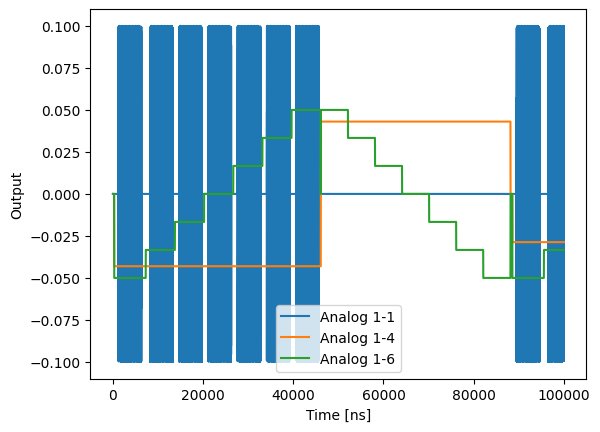

In [25]:
from opx_tools.opx_setup import simulate_program
          
# measurer = VirtualGateSetMeasurement(**k_params)


# plt.figure()
# simulate_program(qmm, measurer.program, measurer.config, int(1e5))

measurer = Virt2(**old_k_params)
plt.figure()
simulate_program(qmm, measurer.program, measurer.config, int(1e5))

2024-06-17 16:16:04,770 - qm - INFO     - Compiling program
2024-06-17 16:16:05,324 - qm - INFO     - Simulating program


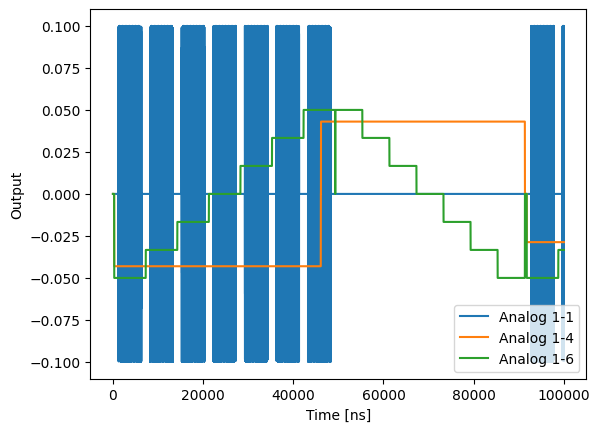

In [30]:
from opx_tools.opx_setup import simulate_program
          
# measurer = VirtualGateSetMeasurement(**k_params)


# plt.figure()
# simulate_program(qmm, measurer.program, measurer.config, int(1e5))

measurer = Virt2(**old_k_params)
plt.figure()
simulate_program(qmm, measurer.program, measurer.config, int(1e5))

In [ ]:
from opx_tools.opx_setup import program_to_file
program_to_file(measurer.program, measurer.config, 'test_script.py')

In [ ]:
measurer.job.halt()

True

2024-06-17 14:57:17,343 - qm - INFO     - Compiling program
compile done
data fetcher done
2024-06-17 15:01:35,588 - qm - INFO     - Compiling program
compile done
data fetcher done


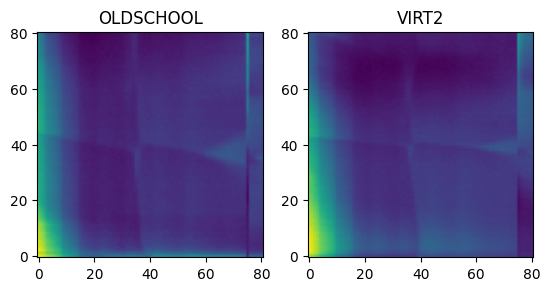

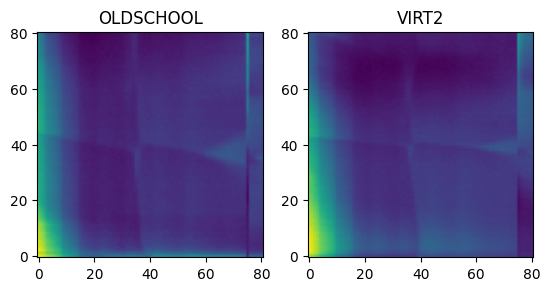

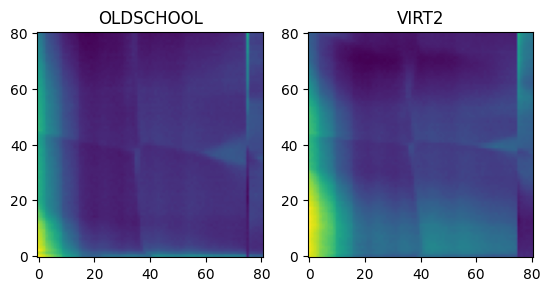

In [ ]:
from opx_tools.opx_setup import simulate_program

measurer = Virt2(**old_k_params)
print('compile done')
measurer.start_acquisition()
print('data fetcher done')
# print('started')
datasets2 = []

for i in range(1):
    datasets2.append(measurer.fetch_results())
measurer.job.halt()

measurer = VirtualGateSetMeasurement(**old_k_params)
print('compile done')
measurer.start_acquisition()
print('data fetcher done')
# print('started')
datasets1 = []

for i in range(1):
    datasets1.append(measurer.fetch_results())

measurer.job.halt()

for dset1, dset2 in zip(datasets1, datasets2):
    fig, axes = plt.subplots(1,2)
    axes[0].imshow(dset1[0]**2 + dset1[1]**2, origin='lower')
    axes[1].imshow(dset2[0]**2 + dset2[1]**2, origin='lower')

    axes[1].set_title('VIRT2')
    axes[0].set_title('OLDSCHOOL')


2024-06-17 16:17:48,279 - qm - INFO     - Compiling program
compile done
data fetcher done
1 done
data fetcher done


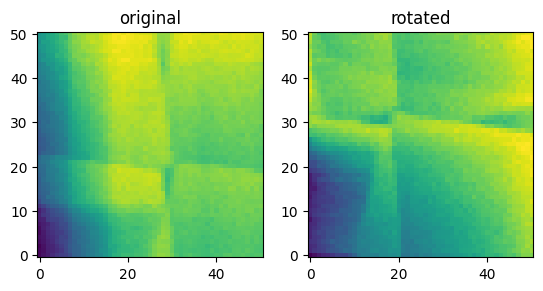

In [36]:
measurer = Virt2(**old_k_params)
print('compile done')
measurer.start_acquisition()
print('data fetcher done')
# print('started')
datasets1 = []

for i in range(1):
    datasets1.append(measurer.fetch_results())
measurer.job.halt()

print('1 done')
# measurer = Virt2(**k_params)
# print('compile done')
virtualisation_matrix = np.array([[0,1],[1,0]])
overrides = measurer.get_overrides_from_virtualisation_matrix(virtualisation_matrix)
measurer.start_acquisition(overrides = overrides)
print('data fetcher done')
# print('started')
datasets2 = []

for i in range(1):
    datasets2.append(measurer.fetch_results())
measurer.job.halt()


for dset1, dset2 in zip(datasets1, datasets2):
    fig, axes = plt.subplots(1,2)
    axes[0].imshow(dset1[0], origin='lower')
    axes[1].imshow(dset2[0], origin='lower')

    axes[0].set_title('original')
    axes[1].set_title('rotated')

In [5]:
from opx_tools.opx_setup import fetch_all_data

all_data = fetch_all_data(measurer.job)

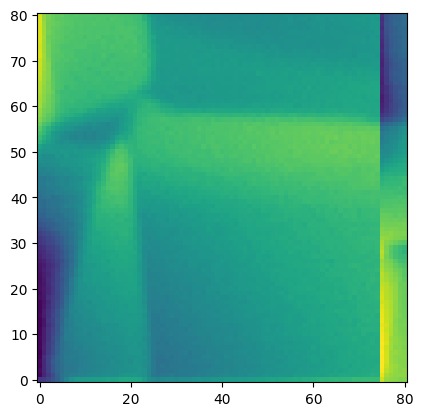

In [8]:
plt.imshow(all_data['I'], origin='lower')

In [12]:
all_data['I_full']

array([], shape=(0, 81, 81), dtype=float64)

TypeError: Invalid shape (0, 81, 81) for image data

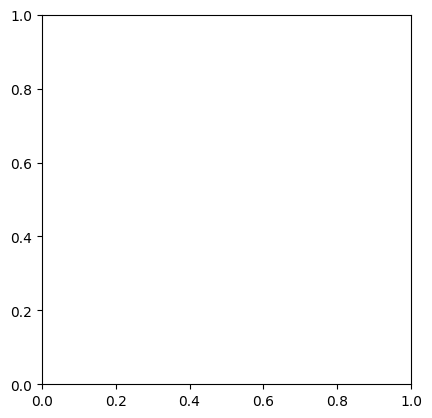

In [11]:
plt.imshow(all_data['I_full'], origin='lower')

In [ ]:
virtualisation_matrix = np.array([[0,1],[1,0]])

new = measurer.get_overrides_from_virtualisation_matrix(virtualisation_matrix)['waveforms']
# print(new)
def get_nums(waveforms_dict):
    a = []
    for pulse in waveforms_dict:
        if 'pulse' in pulse:
            a.append((pulse, waveforms_dict[pulse]))
    return np.array(a)
test_change = get_nums(new)
test_virtual_gate_set = get_nums(measurer.config['waveforms'])
print(test_change)
print(test_virtual_gate_set)

# print(np.array(test_virtual_gate_set) - np.array(test_change))


[['left_inner_dot_plunger.slow_pulse.wf' '0.0']
 ['right_inner_dot_plunger.slow_pulse.wf' '0.1']
 ['left_inner_dot_plunger_copy.big_pulse.wf' '0.0861']
 ['left_inner_dot_plunger_copy.small_pulse.wf' '0.0021525']
 ['right_inner_dot_plunger_copy.big_pulse.wf' '0.0']
 ['right_inner_dot_plunger_copy.small_pulse.wf' '0.0']]
[['left_inner_dot_plunger.slow_pulse.wf'
  {'type': 'constant', 'sample': 0.0861}]
 ['right_inner_dot_plunger.slow_pulse.wf'
  {'type': 'constant', 'sample': 0.0}]
 ['left_inner_dot_plunger_copy.big_pulse.wf'
  {'type': 'constant', 'sample': 0.0}]
 ['right_inner_dot_plunger_copy.big_pulse.wf'
  {'type': 'constant', 'sample': -0.1}]
 ['left_inner_dot_plunger_copy.small_pulse.wf'
  {'type': 'constant', 'sample': 0.0}]
 ['right_inner_dot_plunger_copy.small_pulse.wf'
  {'type': 'constant', 'sample': 0.0025}]]


In [ ]:
measurer.job.is_paused()

True

In [ ]:
all_data2['I_full'].shape

(3, 6561)

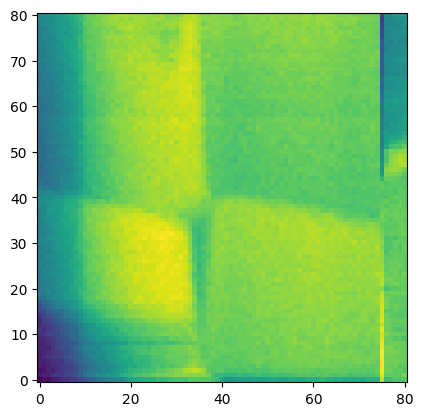

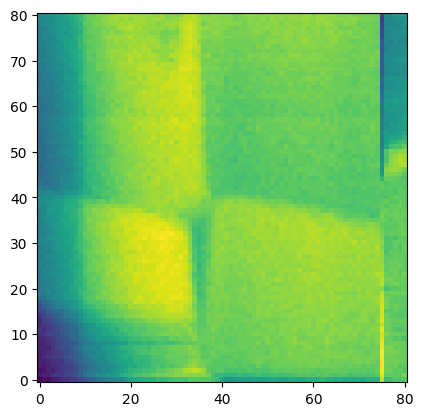

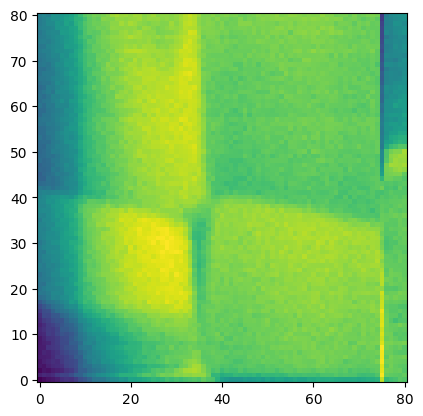

In [ ]:
import matplotlib.pyplot as plt
for dset1 in datasets1 :
    fig, axes = plt.subplots()
    axes.imshow(dset1[0], origin='lower')

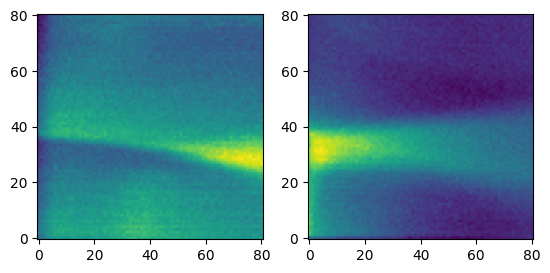

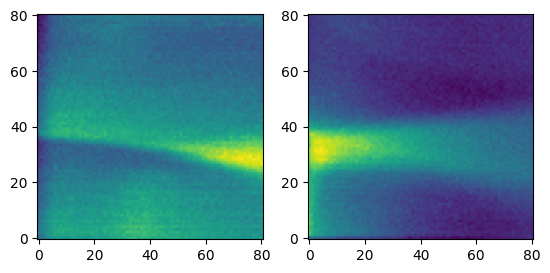

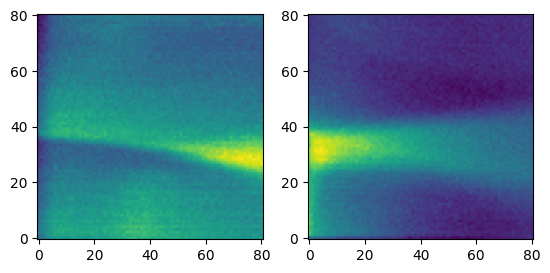

In [ ]:
import matplotlib.pyplot as plt
for dset1, dset2 in zip(datasets1, datasets2):
    fig, axes = plt.subplots(1,2)
    axes[0].imshow(dset1[0]**2 + dset1[1]**2, origin='lower')
    axes[1].imshow(dset2[0]**2 + dset2[1]**2, origin='lower')
# plt.imshow(datasets[0])

In [ ]:
# with open(opx_config,'r') as file:
#     config = json.load(file)

qmm=QuantumMachinesManager(host='10.209.64.165', cluster_name = "slot_a")
        #qmm.close_all_quantum_machines()
qm=qmm.open_qm(config, close_other_machines=True)

2024-06-13 09:53:51,909 - qm - INFO     - Performing health check
2024-06-13 09:53:51,920 - qm - INFO     - Health check passed
